# NBA Shooting Data
This dataset is based on shooting statistics that can be found on [NBA.com](https://www.nba.com/stats/players/shooting/?Season=2020-21&SeasonType=Playoffs&PerMode=Totals). It consists of shots taken by four different players during the 2021 NBA Playoffs.



# 1. Defining the Question
## Based on a player's statistics and shot map data, what is the probability that they will make or miss their next shot from a specific location, given the presence of a particular defender?
We seek to predict the likelihood of a player making or missing their next shot, using detailed information about their shooting history and positioning on the court. This prediction will also factor in the specific defender involved into the play. By analyzing this information, we gain insight into each player's style of play, shot choices, and performance against others which can give us information regarding the success of failure of a new shot. 

# 2. Data Collection 

For this analysis, we utilized data sourced from datacamp which we believe obtained that data through the NBA API. The dataset includes detailed shot and player statistics specifically from the 2021 NBA Playoffs, covering four players who participated during that postseason. This data includes shot location, shooter identity, shot range, defender identity, and the outcome of each shot attempt, among other relevant details. The shots included are only the shots where the shooter and the defender are one of 4 players (Chris Paul, Russle Westbrook, Steph Curry, Trae Young). 

In [252]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly
import numpy as np

df = pd.read_csv('nba_players_shooting.csv', index_col=0)
print(df)

          SHOOTER          X          Y     RANGE           DEFENDER   SCORE
INDEX                                                                       
0      Seth Curry  -3.808987   5.583621    (0, 4)         Chris Paul    MADE
1      Seth Curry  -0.104279   5.919138    (0, 4)         Trae Young    MADE
2      Seth Curry  -0.525864   8.912239    (0, 4)         Trae Young    MADE
3      Seth Curry  -0.790616   7.503782    (0, 4)         Chris Paul    MADE
4      Seth Curry   2.119074   5.320534    (0, 4)         Trae Young    MADE
...           ...        ...        ...       ...                ...     ...
771    Trae Young  23.952742  15.324875  (25, 29)  Russell Westbrook  MISSED
772    Trae Young   6.221766  30.756008  (25, 29)         Seth Curry  MISSED
773    Trae Young  16.397467  27.660323  (25, 29)         Chris Paul  MISSED
774    Trae Young -11.257104  30.713097  (25, 29)  Russell Westbrook  MISSED
775    Trae Young -11.289371  31.064197  (25, 29)         Chris Paul  MISSED

# 3. Data Cleaning and Preparation

Since the data originated from the NBA, the dataset arrived in a relatively clean and structured state. Typically, this stage would require addressing missing values, correcting errors, and performing transformations to make the data analysis-ready. However, in this instance, minimal cleaning was needed. Reference the Data Dictionary to understand the composition of the dataset.

#### Data Dictionary

|variable |class     |description                                                  |
|:--------|:---------|:------------------------------------------------------------|
|SHOOTER  |String    |Name of the player taking the shot                           |
|X        |float     |Horizontal distance of the shot taken from the baseline in ft  |
|Y        |float     |Vertical distance of the shot taken from the baseline in ft    |
|RANGE    |String    |Radius range of the shot taken from the baseline in ft         |
|DEFENDER |String    |Name of the player defending the shot                        |
|SCORE    |String    |'MADE' if shot is scored, else 'MISSED'                      |

# 4. Data Analysis Part 1
## Exploratory Data Analysis
The initial phase of data analysis focused on conducting exploratory data analysis (EDA) to better understand the shooting behavior of specific players. In this section we will identify what the differentiating and cirtical factors to a shot being made are.

## All Shots taken during the NBA 2021 Playoffs By Selected Players - Change Colors

Shot maps give a visual representation of where players are taking their shots on the court. By creating an overall shot map for all players, we can quickly identify common shooting zones, hotspots, and trends across the entire dataset. This helps establish a baseline understanding of typical shooting behavior during the 2021 NBA Playoffs.

We made the chart readable by providing basketball court lines and the hoop to indicate shot locations. The X-Axis is the "Horizontal Distance from the Rim", while the Y-Axis is "Vertical Distance from the Rim".

In [253]:
# all shots taken scatter plot
fig1 = px.scatter(df, x='X', y='Y', color='SHOOTER', title='All Shots Taken by Selected Players')

# court dimensions
fig1.update_layout(
    xaxis_title='Horizontal Distance from Rim',
    yaxis_title='Vertical Distance from Rim',
    width=800,
    height=600,
    xaxis=dict(range=[-30, 30], showgrid=False, zeroline=False, title_standoff=30),
    yaxis=dict(range=[0, 40], showgrid=False, zeroline=False),
    plot_bgcolor='white',
    shapes=[
        dict(type="circle", xref="x", yref="y", x0=-0.75, y0=4.5, x1=0.75, y1=6, line=dict(color="orange")),  # hoop
        dict(type="line", xref="x", yref="y", x0=-3, y0=4.3, x1=3, y1=4.3, line=dict(color="black", width=3)),  # backboard
        dict(type="rect", xref="x", yref="y", x0=-8, y0=0, x1=8, y1=19, line=dict(color="black")),  # paint (key)
        dict(type="circle", xref="x", yref="y", x0=-6, y0=13, x1=6, y1=25, line=dict(color="black")),  # free throw circle
        dict(type="path", path="M -4 5.25 A 4 4 0 0 1 4 5.25", line=dict(color="black")), 
        dict(type="path", xref="x", yref="y", path="M -22 5.25 A 23.75 23.75 0 0 1 22 5.25", line=dict(color="black", width=2)),  # 3PT arc
        dict(type="line", x0=-22, y0=0, x1=-22, y1=14, line=dict(color="black")),  # left corner 3 line
        dict(type="line", x0=22, y0=0, x1=22, y1=14, line=dict(color="black"))  # right corner 3 line
    ]
)

fig1.update_yaxes(scaleanchor="x", scaleratio=1)

# add 3-point arc
theta = np.linspace(0, np.pi, 200)
radius = 22
x_arc = radius * np.cos(theta)
y_arc = (radius * 0.7) * np.sin(theta) + 14 

fig1.add_scatter(
    x=x_arc,
    y=y_arc,
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False
)

fig1.show()


## Shot map per player

After visualizing the overall data, we created individual shot maps for Trae Young, Seth Curry, Chris Paul, and Russell Westbrook. These player-specific maps allow us to see personalized shooting patterns, such as preferred locations, tendencies, and shot distribution. Comparing individual maps reveals the different styles and strategies employed by each player.

To provide more detail for each player, we split the types of dots into two: Green dots indicate made shots, while red dots indicate missed shots. We also provided the statistics on their made shots, total shots taken, and their accuracy of shooting (called Field Goal%).

In [254]:
players = ['Seth Curry', 'Chris Paul', 'Russell Westbrook', 'Trae Young']
figs = []  

for idx, x in enumerate(players, start=1):
    made = df[((df['SHOOTER'] == x) & (df['SCORE'] == 'MADE'))].count()
    missed = df[((df['SHOOTER'] == x) & (df['SCORE'] == 'MISSED'))].count()
    accuracy = ((made[0] / (made[0] + missed[0]))*100).round(2)
    color_map = {'MADE': 'green', 'MISSED': 'red'}

    fig = px.scatter(
        df[df['SHOOTER'] == x], 
        x='X', 
        y='Y', 
        color='SCORE', 
        color_discrete_map=color_map,
        title=f'{x} Shot Map'
    )

    fig.update_layout(
        xaxis_title='Horizontal Distance from Rim',
        yaxis_title='Vertical Distance from Rim',
        width=800,
        height=600,
        xaxis=dict(range=[-30, 30], showgrid=False, zeroline=False),
        yaxis=dict(range=[0, 40], showgrid=False, zeroline=False),
        plot_bgcolor='white',
        shapes=[
            dict(type="circle", xref="x", yref="y", x0=-0.75, y0=4.5, x1=0.75, y1=6, line=dict(color="orange")),
            dict(type="line", xref="x", yref="y", x0=-3, y0=4.3, x1=3, y1=4.3, line=dict(color="black", width=3)),
            dict(type="rect", xref="x", yref="y", x0=-8, y0=0, x1=8, y1=19, line=dict(color="black")),
            dict(type="circle", xref="x", yref="y", x0=-6, y0=13, x1=6, y1=25, line=dict(color="black")),
            dict(type="path", path="M -4 5.25 A 4 4 0 0 1 4 5.25", line=dict(color="black")),
            dict(type="path", xref="x", yref="y", path="M -22 5.25 A 23.75 23.75 0 0 1 22 5.25", line=dict(color="green", width=2)),
            dict(type="line", x0=-22, y0=0, x1=-22, y1=14, line=dict(color="black")),
            dict(type="line", x0=22, y0=0, x1=22, y1=14, line=dict(color="black"))      
        ],
        annotations=[
            dict(
                x=-0.07,
                y=1.1,
                xref='paper',
                yref='paper',
                text=f'Shots made = {made[0]} | Shots missed = {missed[0]} | Field Goal% = {accuracy}%',
                showarrow=False,
                font=dict(size=12)
            )
        ]
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)

    # 3pt arc addition
    theta = np.linspace(0, np.pi, 200)
    radius = 22
    x_arc = radius * np.cos(theta)
    y_arc = (radius * 0.7) * np.sin(theta) + 14

    fig.add_scatter(
        x=x_arc,
        y=y_arc,
        mode='lines',
        line=dict(color='black', width=2),
        showlegend=False
    )

    globals()[f'fig{idx}'] = fig  

    fig.show()

## New variables - DISTANCE & CLASSIFICATION

We are adding new variables and classifications of the shots. The new variables are made with the purpose of understanding what kind of plays the players tend to make. We can classify what type of shots these players love taking the most, from a Close 2 Pointer all the way to a Deep 3 Pointer. We have defined the type of shots to their corresponding ranges.

#### Data Dictionary - Updated with new variables

|variable         |class     |description                                                          |
|:----------------|:---------|:--------------------------------------------------------------------|
|SHOOTER          |String    |Name of the player taking the shot                                   |
|X                |float     |Horizontal distance of the shot taken from the baseline in ft          |
|Y                |float     |Vertical distance of the shot taken from the baseline in ft            |
|RANGE            |String    |Radius range of the shot taken from the baseline in ft                 |
|DEFENDER         |String    |Name of the player defending the shot                                |
|SCORE            |String    |'MADE' if shot is scored, else 'MISSED'                              |
|DISTANCE         |float     |Distance between the place where the shoot was taken and the basket  |
|CLASSIFICATION   |String    |Classifies the shoot in the categories seen in the next table        |


#### Shoot Distance Classification

|Classification     |Distance (feet) |Label                                                        |
|:------------------|:---------------|:------------------------------------------------------------|
|Deep 3 Pointer     |33>             |distance1                                                    |
|3 Pointer          |23>=26          |distance2                                                    |
|Deep 2 Pointer     |18>=23          |distance3                                                    |
|Mid-Range 2 Pointer          |10>=18          |distance4                                                    |
|Close 2 Pointer    |<=10            |distance5                                                    |

In [255]:
df['DISTANCE'] = (df['X']**2 + df['Y']**2)**(1/2)

copy = df['DISTANCE'].copy(deep=True)
classification = []
for x in range (0,776):
    if copy[x] > 33:
        classification.append('distance1')
    elif copy[x] >= 23:
        classification.append('distance2')
    elif copy[x] >= 18:
        classification.append('distance3')
    elif copy[x] >= 10:
        classification.append('distance4')
    elif copy[x] < 10:
        classification.append('distance5')

df['CLASSIFICATION'] = classification


In [256]:
classes = ['distance1','distance2','distance3','distance4','distance5']
table = []

for x in players:
    for y in classes:
        shoot_class = len(df[((df['SHOOTER'] ==  x) & (df['CLASSIFICATION'] == y))].value_counts())
        table.append(shoot_class)

data = {
    'Players':['Seth Curry','Chris Paul','Russell Westbrook','Trae Young'],
    'Deep 3 Pointer':[table[0],table[5],table[10],table[15]],
    '3 Pointer':[table[1],table[6],table[11],table[16]],
    'Deep 2 Pointer':[table[2],table[7],table[12],table[17]],
    '2 Pointer':[table[3],table[8],table[13],table[18]],
    'Close 2 Pointer':[table[4],table[9],table[14],table[19]]
}
data_df = pd.DataFrame(data)

## Analyzing the characteristics of the player's
The charts categorize shots into five types: Deep 3 Pointer, 3 Pointer, Deep 2 Pointer, Mid-Range 2 Pointer, and Close 2 Pointer, representing different shot types per player. Additionally, we included four individual bar charts, each displaying shot types for a specific player.

In [257]:
data_df = data_df.rename(columns={'2 Pointer': 'Mid-Range 2 Pointer'})

expected_columns = ['Players', 'Deep 3 Pointer', '3 Pointer', 'Deep 2 Pointer', 'Mid-Range 2 Pointer', 'Close 2 Pointer']
missing_columns = [col for col in expected_columns if col not in data_df.columns]
if missing_columns:
    raise ValueError(f"The following expected columns are missing from the DataFrame: {missing_columns}")

# grouped bar chart - shot selection
fig = px.bar(
    data_df, 
    x='Players', 
    y=['Deep 3 Pointer', '3 Pointer', 'Deep 2 Pointer', 'Mid-Range 2 Pointer', 'Close 2 Pointer'],
    labels={'value': 'Total of Shots', 'variable': 'Types of Shot'},
    title='Breakdown of Types of Shots by Player',
    color_discrete_map={
        'Deep 3 Pointer': 'cyan',
        '3 Pointer': 'lightgreen',
        'Deep 2 Pointer': 'gold',
        'Mid-Range 2 Pointer': 'lightsalmon',
        'Close 2 Pointer': 'lightcoral'
    },
    barmode='group'
)  
fig.update_yaxes(title_text='Total Number of Shots')

globals()['fig5'] = fig  # Save as fig5
fig.show()

## Calculating the total of points per player
We created a grouped bar chart to categorize shots into two groups: total 2-pointers scored and 3-pointers scored. The bars represent the total shots made for each shot type.

In [258]:
import plotly.graph_objects as go

# Summing up the 2 pointers and 3 pointers for each player
data_df['Total 2 Pointers'] = data_df['Deep 2 Pointer'] + data_df['Mid-Range 2 Pointer'] + data_df['Close 2 Pointer']
data_df['Total 3 Pointers'] = data_df['Deep 3 Pointer'] + data_df['3 Pointer']

# Creating the bar plot
fig = go.Figure()

# Adding bars for 2 Pointers
fig.add_trace(go.Bar(
    x=data_df['Players'],
    y=data_df['Total 2 Pointers'],
    name='2 Pointers',
    marker_color='rgb(173, 216, 230)'  # Pastel blue
))

# Adding bars for 3 Pointers
fig.add_trace(go.Bar(
    x=data_df['Players'],
    y=data_df['Total 3 Pointers'],
    name='3 Pointers',
    marker_color='rgb(255, 182, 193)'  # Pastel pink
))

# Updating layout for better readability
fig.update_layout(
    title='Number of 2 Pointers vs 3 Pointers Made by Each Player',
    xaxis_title='Players',
    yaxis_title='Number of Shots',
    barmode='group'
)

# Displaying the plot
fig.show()

## 1x1 Matchup between the players
This heat map displays shooting accuracy for each player when defended by another, with darker shades representing higher accuracy. This format makes it easier to compare performance at a glance, revealing patterns such as which defenders allow the highest shooting percentages and which matchups are most challenging. The accompanying color scale provides a clear reference for interpreting accuracy levels, enhancing the readability of the data.

In [259]:
table = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
w = 0
for x in players:
    z = 0
    for y in players:
        if x != y:
            made = df[((df['SHOOTER'] == x) & (df['DEFENDER'] == y) & (df['SCORE'] == 'MADE') )].count()
            missed = df[((df['SHOOTER'] == x) & (df['DEFENDER'] == y) & (df['SCORE'] == 'MISSED') )].count()
            accuracy = ((made.iloc[0] / (made.iloc[0] + missed.iloc[0])) * 100).round(2)
            table[w][z] = accuracy
        else:
            accuracy = 0
        table[w][z] = accuracy
        z += 1
    w += 1

data = {
    'Defender': ['Seth Curry', 'Chris Paul', 'Russell Westbrook', 'Trae Young'],
    'Seth Curry': table[0],
    'Chris Paul': table[1],
    'Russell Westbrook': table[2],
    'Trae Young': table[3]
}
table_df = pd.DataFrame(data)

# Create the heatmap
fig = px.imshow(
    table_df.set_index('Defender').T,
    labels=dict(x="Defender", y="Shooter", color="Accuracy (%)"),
    x=table_df['Defender'],
    y=table_df.columns[1:],
    title="Shooting Accuracy Based on Various Defenders",
    color_continuous_scale='Blues'
)

globals()['fig10'] = fig  # Save as fig10
fig.show()

## Number of Difficult Shots by Shooter
Here we introduce a new bar chart displaying the number of difficult shots by shooter. A difficult shot in this context is defined as a made shot taken from 23 feet or more while being defended by a player who typically holds the shooter below their average field goal percentage. To identify these shots, we first calculated each shooter's overall field goal percentage and their accuracy against different defenders. We then determined defender-shooter matchups where the defender significantly impacted the shooter's accuracy. Finally, we filtered shots based on distance and matchup difficulty, counting the total difficult shots per shooter.

The resulting bar chart provides a clear comparison of which players excel under tough defensive conditions. We kept the visualization simple yet effective, using distinct colors to differentiate shooters while ensuring the focus remains on the data. This addition helps highlight key performers in high-pressure situations and provides further insights beyond the original dataset.

In [260]:
import plotly.express as px

# calculate accuracy matrix
players = ['Seth Curry','Chris Paul','Russell Westbrook','Trae Young']
table = [[0 for _ in players] for _ in players]
shooter_avg = {}

# calculate accuracy matrix + shooter's overall FG%
for i, shooter in enumerate(players):
    total_made = df[(df['SHOOTER'] == shooter) & (df['SCORE'] == 'MADE')].shape[0]
    total_attempts = df[df['SHOOTER'] == shooter].shape[0]
    shooter_avg[shooter] = (total_made / total_attempts) * 100

    for j, defender in enumerate(players):
        if shooter != defender:
            made = df[(df['SHOOTER'] == shooter) & (df['DEFENDER'] == defender) & (df['SCORE'] == 'MADE')].shape[0]
            missed = df[(df['SHOOTER'] == shooter) & (df['DEFENDER'] == defender) & (df['SCORE'] == 'MISSED')].shape[0]
            total = made + missed
            accuracy = (made / total) * 100 if total > 0 else 0
            table[i][j] = round(accuracy, 2)
        else:
            table[i][j] = 0

# clutch shooter-defender pairs
hard_pairs = set()
for i, shooter in enumerate(players):
    for j, defender in enumerate(players):
        if shooter != defender and table[i][j] < shooter_avg[shooter]:  
            hard_pairs.add((shooter, defender))

# filter clutch shots
hard_shots = df[
    df.apply(lambda row: (
        (row['SHOOTER'], row['DEFENDER']) in hard_pairs and
        np.sqrt(row['X']**2 + row['Y']**2) >= 23
    ), axis=1)
]

# count clutch shots per shooter
hard_shots_count = hard_shots['SHOOTER'].value_counts().reset_index()
hard_shots_count.columns = ['SHOOTER', 'HARD_SHOTS']

# bar graph
fig = px.bar(
    hard_shots_count,
    x='SHOOTER',
    y='HARD_SHOTS',
    title='Number of Difficult Shots by Shooter<br><span style="font-size:12px;">Where difficult is defined by high performing defender match-up and 23 feet or more range.</span>',
    labels={'SHOOTER': 'Shooter', 'HARD_SHOTS': 'Number of Difficult Shots'},
    color='SHOOTER'
)

globals()['fig11'] = fig
fig.show()

### EDA Conclusion - 1 on 1 difficult shots

The first core group of metrics that impact a shot being made are the shooter and the defender. From the 'Shooting Accuracy Based on Different Defenders' we see that the relationship between the shooter and defender plays as significant role into accuracy. Furthermore, to better understand a player, we will use that players shooting accuracy as a factor to help quantify if they are a good shooter or not.

Secondly, the type of shot is also very important. From looking at the spread of shots taken or the 2 pointer versus 3 pointer distributions we can clearly see that different players have different accuracies and tendencies for their game. To measure this, we can look at factors such as angle or distance from the hoop to classify the shot.

The shot map, number of 2 pointer and 3 pointer taken/made, and the difficult shots made were also important visuals. The findings from these plots further support that individuals have unique playign style. In our model, we will measure the finding from shot map by calculating fields for angle and distance from the hoop, for 2 pointer versus 3 pointer data we included a new field that determines where a shot is worth 2 or 3 points, and lastly for shot difficulty, this is a metric of taking a shot versus a tough defender and a long range which is already considered in our defined factors.

# 4. Data Analysis Part 2
### Extended Analysis: Logistical Regression Model and Random Forest Classifier
Here, we aimed to create models to answer the question, "Based on a player's statistics and shot map data, what is the probability that they will make or miss their next shot from a specific location, given the presence of a particular defender?" To do this, we first engineered a few new features from the original dataset, including the distance and angle of each shot relative to the basket, an indicator for whether the shot was a three-pointer, the player's average shooting percentage, and the defender's average allowed shooting percentage. Categorical variables, such as shooter and defender names, were one-hot encoded to make them suitable for machine learning algorithms. Using these prepared features, we built two predictive models: a logistic regression model and a random forest classifier. Both models were trained to classify whether a shot would be made or missed, and model performance was evaluated through test set accuracy, cross-validation scores, and confusion matrices to ensure reliability and generalizability.

## Random Forest
The random forest model took a flexible, nonlinear approach to predicting shot outcomes by constructing decision trees and aggregating their predictions. This method captures complex interactions between features, such as how a specific combination of shot distance and defender affects the likelihood of a player making or missing a shot. Random forests typically perform well on classification tasks involving non-linear relationships and can reduce the risk of overfitting by averaging over many trees. In our analysis, the model achieved a test set accuracy of 62.8%, which was lower than that of logistic regression. The cross-validation accuracy was 39.4% ± 9.2%, indicating that the model struggled to generalize effectively across different subsets of the data. The confusion matrix revealed 38 correct predictions for made shots and 60 for missed shots, with 29 misclassifications in each category. While the random forest model has a foundational level of accuracy, we saw the Random Forest overfitted the data.

Test Set Accuracy: 0.628
Cross-Validation Accuracy: 0.381 ± 0.105


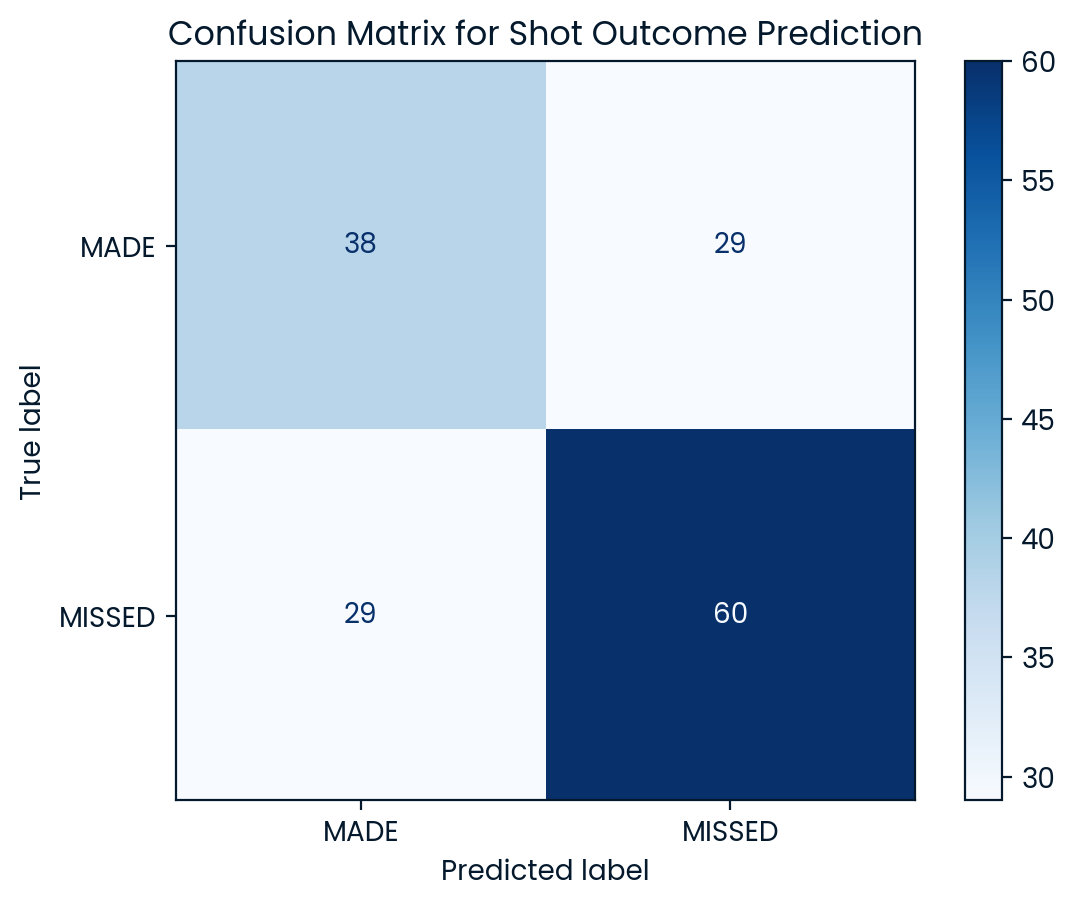

In [261]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# distance from rim
df['DIST_FROM_HOOP'] = np.sqrt((df['X'])**2 + (df['Y'] - 5.25)**2)

# angle from hoop
df['ANGLE_FROM_HOOP'] = np.degrees(np.arctan2(df['Y'] - 5.25, df['X']))

# 3 ptrs
df['IS_3_POINTER'] = (df['DIST_FROM_HOOP'] > 23).astype(bool)

# shooting percentage
df['AVG'] = df.groupby('SHOOTER')['SCORE'].transform(lambda x: (x == 'MADE').mean())

# categorical
X_categorical = df[['SHOOTER', 'DEFENDER']]

# one hot encode shooter and defender
X_categorical = df[['SHOOTER', 'DEFENDER']]
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X_categorical)

# numerical and categorical features
X_numerical = df[['DIST_FROM_HOOP', 'ANGLE_FROM_HOOP', 'IS_3_POINTER', 'AVG']].values
X = np.hstack([X_numerical, X_encoded])

# y back to boole
y = (df['SCORE'] == 'MADE').astype(bool)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# test set performance
test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.3f}")

# 5-Fold cv
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

y_pred = model.predict(X_test)

# confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["MADE", "MISSED"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Shot Outcome Prediction")
plt.show()
fig12 = disp.figure_

In [262]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# names for display
feature_names = ['DIST_FROM_HOOP', 'ANGLE_FROM_HOOP', 'IS_3_POINTER', 'AVG']

# choose numeric features
features_to_plot = [0, 1, 2, 3]

# create figure
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()[:len(features_to_plot)]

disp = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=features_to_plot,
    feature_names=feature_names,
    ax=ax
)

plt.suptitle("Partial Dependence Plots for Key Numeric Features", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
pdp = disp.figure_
plt.close(pdp)

## Logistic Regression
The logistic regression model provided a linear and interpretable baseline for predicting shot outcomes. It estimates the probability of a shot being made based on features such as shot distance, angle, shot type, and both the shooter’s and defender’s average performance. One of the key strengths of this model is its ability to produce feature coefficients, allowing us to identify which variables had the strongest positive or negative impact on shot success. This interpretability made it especially valuable in understanding how specific player-defender matchups and shot characteristics influence outcomes. The model achieved a test set accuracy of 75.6%, reflecting strong predictive performance on unseen data. However, its cross-validation accuracy was 60.4% ± 13.3%, suggesting variability in performance across different data splits. The confusion matrix shows that the model correctly predicted 48 made shots and 70 missed shots, while misclassifying 19 shots in each category. Despite being a simpler model, logistic regression proved both effective and informative in modeling shot probability.

Test Set Accuracy: 0.756
Cross-Validation Accuracy: 0.604 ± 0.133


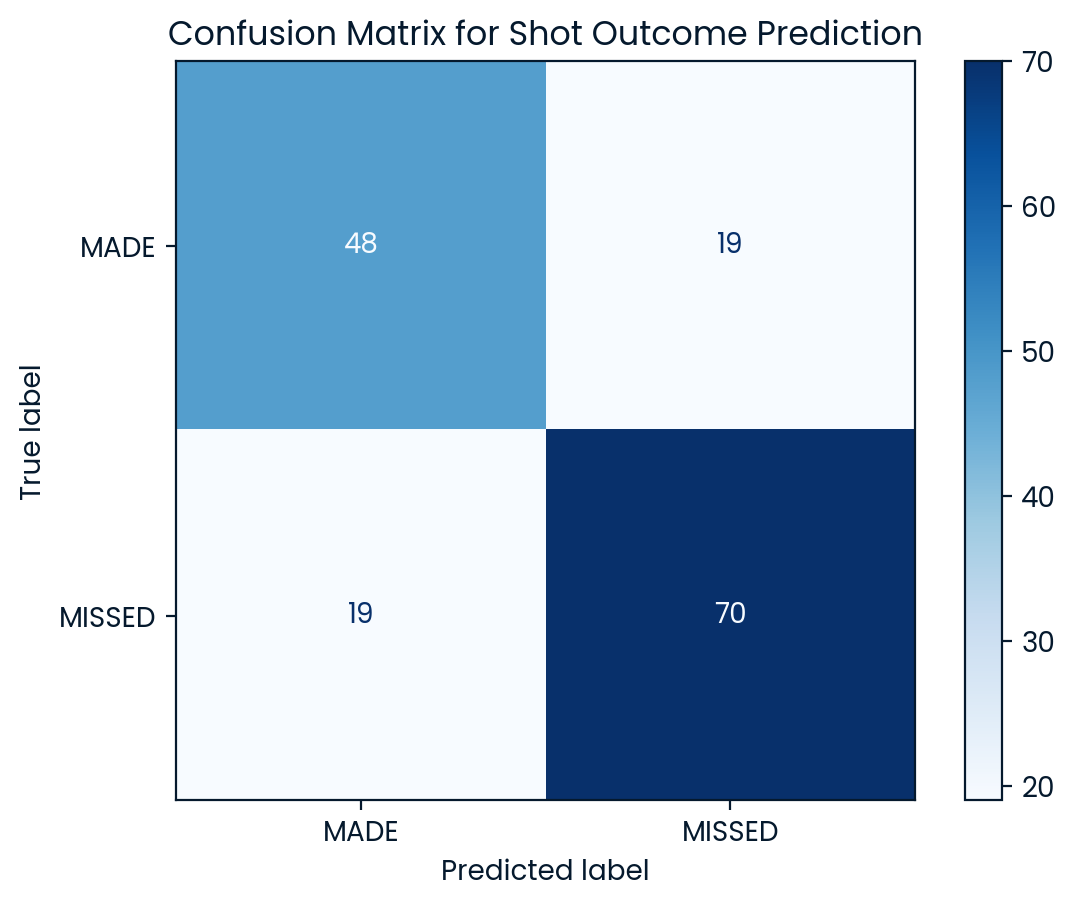

In [263]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1/0 Made/Missed
y = (df['SCORE'] == 'MADE').astype(int)

# distance from rim
df['DIST_FROM_HOOP'] = np.sqrt((df['X'])**2 + (df['Y'] - 5.25)**2)

# angle from rim
df['ANGLE_FROM_HOOP'] = np.arctan2(df['Y'] - 5.25, df['X'])

# 3-pointers
df['IS_3_POINTER'] = (df['DIST_FROM_HOOP'] > 23).astype(int)

# shooter average
df['AVG'] = df.groupby('SHOOTER')['SCORE'].transform(lambda x: (x == 'MADE').mean())

# one-hot encode shooter and defender
X_categorical = df[['SHOOTER', 'DEFENDER']]
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X_categorical)

# combine numerical and categorical features
X_numerical = df[['DIST_FROM_HOOP', 'ANGLE_FROM_HOOP', 'IS_3_POINTER', 'AVG']].values
X = np.hstack([X_numerical, X_encoded])

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# test accuracy
test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.3f}")

# 20-Fold CV
cv_scores = cross_val_score(model, X, y, cv=20)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# predictions
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["MADE", "MISSED"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Shot Outcome Prediction")
plt.show()

# Save the figure correctly
fig14 = disp.figure_

In [264]:
# feature names
cat_features = encoder.get_feature_names_out(['SHOOTER', 'DEFENDER'])
all_features = ['DIST_FROM_HOOP', 'ANGLE_FROM_HOOP', 'IS_3_POINTER', 'AVG'] + list(cat_features)

# coefficients
import pandas as pd
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

                      Feature  Coefficient
7  DEFENDER_Russell Westbrook    -1.079077
9         DEFENDER_Trae Young     1.015891
4   SHOOTER_Russell Westbrook    -0.974650
5          SHOOTER_Seth Curry     0.362186
2                IS_3_POINTER    -0.177561
3                         AVG     0.176050
8         DEFENDER_Seth Curry    -0.166527
6          SHOOTER_Trae Young     0.118320
1             ANGLE_FROM_HOOP    -0.096818
0              DIST_FROM_HOOP    -0.015594


In [265]:
import pandas as pd
import matplotlib.pyplot as plt

# feature names and coefficients
feature_names = ['DIST_FROM_HOOP', 'ANGLE_FROM_HOOP', 'IS_3_POINTER', 'AVG'] + list(encoder.get_feature_names_out(['SHOOTER', 'DEFENDER']))
coefs = model.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['Abs Coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs Coef', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
fig15 = plt.gcf()
#plt.show()
plt.close(fig15)

In [266]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# names for display
feature_names = ['DIST_FROM_HOOP', 'ANGLE_FROM_HOOP', 'IS_3_POINTER', 'AVG']

# choose numeric features by index 
features_to_plot = [0, 1, 2, 3]

# PDP plots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

pdp_disp = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=features_to_plot,
    feature_names=feature_names,
    ax=ax
)

plt.suptitle("Partial Dependence Plots for Key Numeric Features - Logistic Regression", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
pdp2 = pdp_disp.figure_
#plt.show()
plt.close(pdp2)

# 5. Interpretation and Reporting

In this final stage of the workflow, we interpret our results and answer the central question:  
**"Based on a player's statistics and shot map data, what is the probability that they will make or miss their next shot from a specific location, given the presence of a particular defender?"**

This section brings together the findings from our visual analysis and predictive modeling. By organizing our outputs and insights clearly, we aim to communicate the results in a way that would be understandable and actionable for stakeholders such as coaches, analysts, or players.

PDP plots were a key way in which we assessed how well a model was handling the factors. PDP illustrates how a factors contribution to the outcome changes as that factor changes.

### Random Forest Model
The random forest model is able to address the complex nature of this question through qualitative and quantitative data. This complexixty can work for, but in our case the random forest overfit the data

The model achieved a **test set accuracy of 62.8%**, with a **cross-validation accuracy of 38.1% ± 10.5%**. The confusion matrix showed a balanced performance, with **38 correct predictions for made shots**, **60 for missed shots**, and **29 errors in each category**.

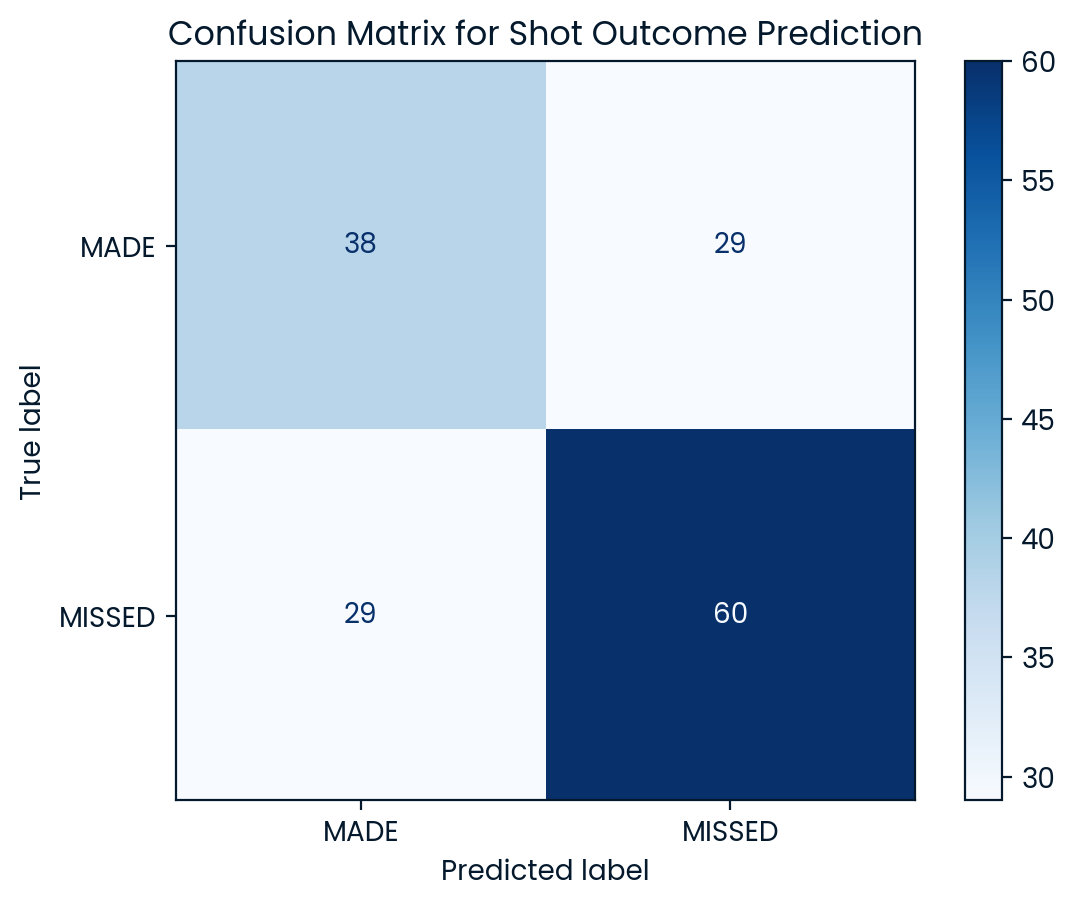

In [267]:
plt.figure(fig12)
plt.show()

This suggests the model may have struggled with overfitting or lacked sufficient feature variety to capitalize on its complexity. Despite its theoretical flexibility, it did not outperform the simpler model in this case.

This is highlighted by the highly volatile PDP plots for Distance and Angle from the hoop. This volatility suggests that the Random Forest was doing too much with the data given and overcompensated.

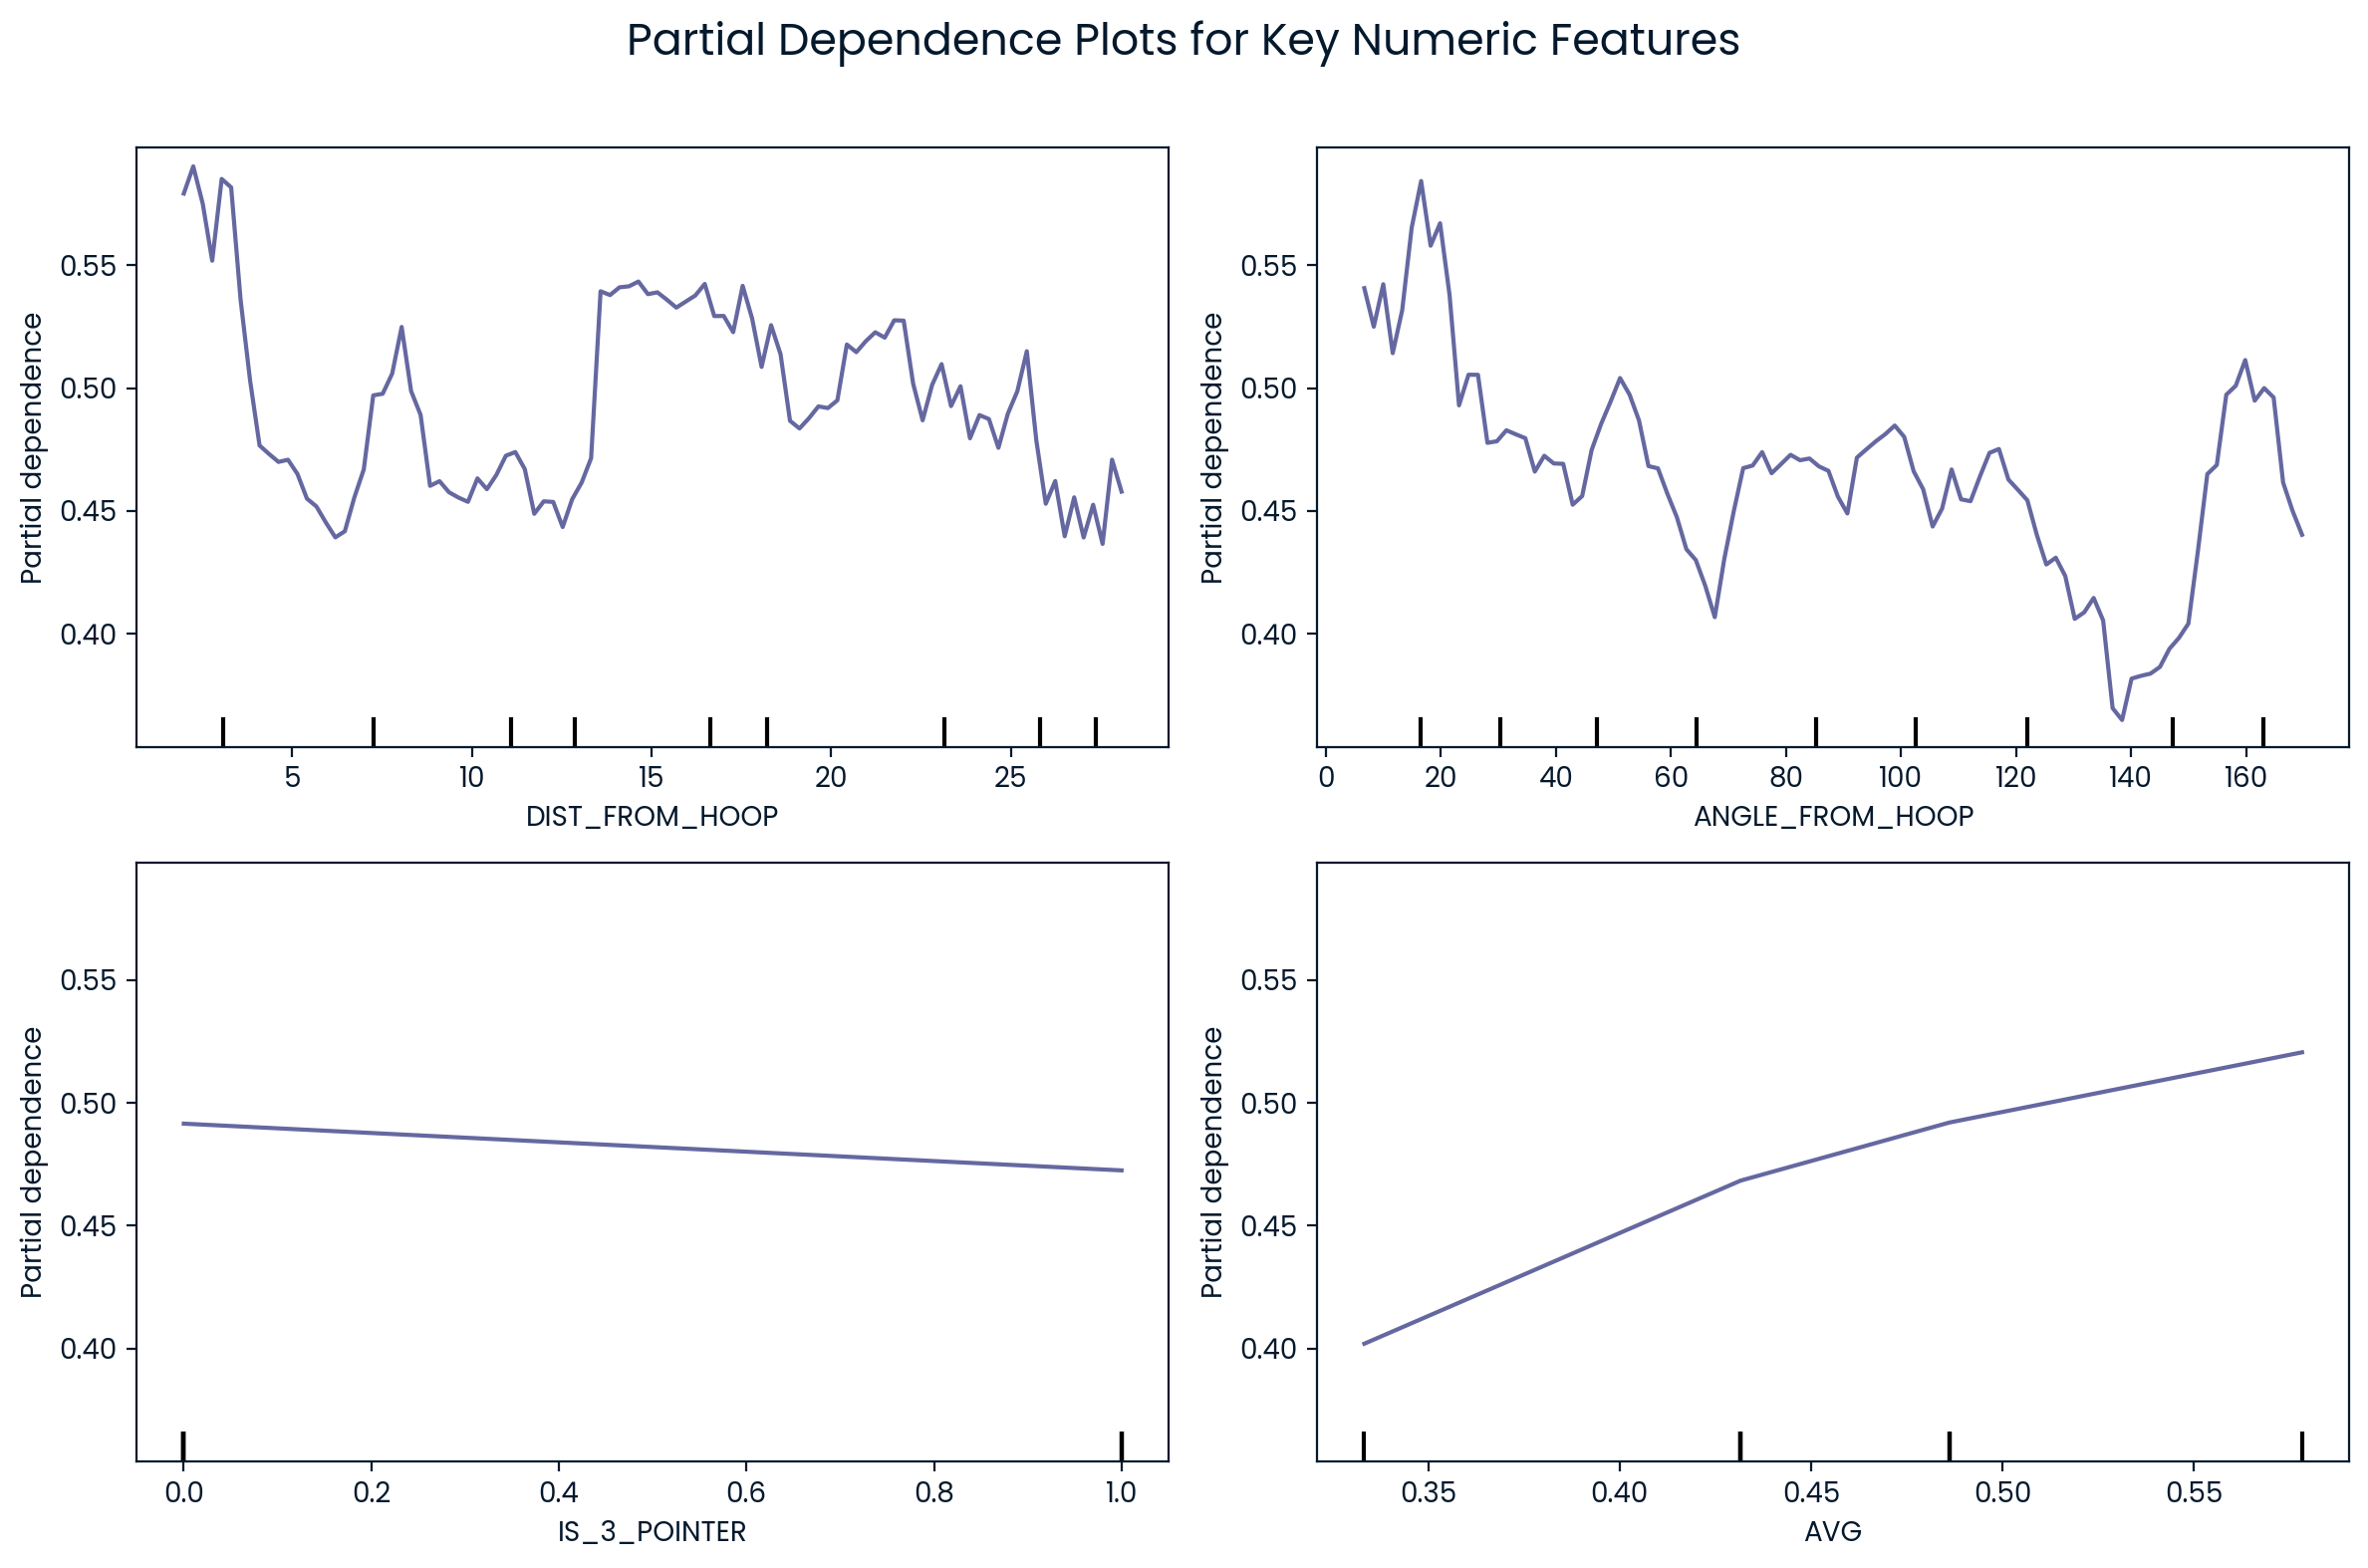

In [268]:
plt.figure(pdp)
plt.show()

### Logistic Regression

The logistic regression model served as a baseline due to its simplicity and interpretability. It estimates the probability of a shot being made using a linear combination of the input features. One key advantage of this model is that it outputs coefficients, which show how much each feature contributes to a prediction.

The model achieved a **test set accuracy of 75.6%**, with a **cross-validation accuracy of 60.4% ± 13.3%**. The confusion matrix showed a balanced performance, with **48 correct predictions for made shots**, **70 for missed shots**, and **19 errors in each category**.

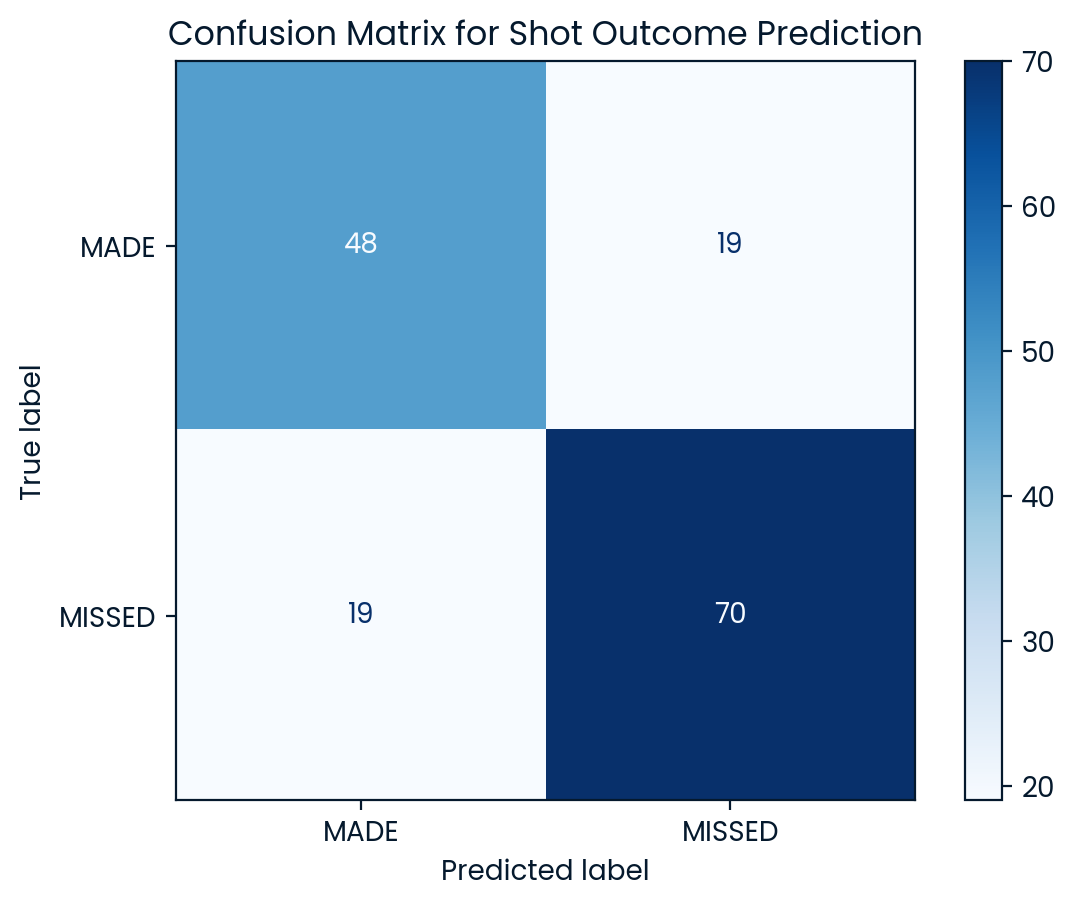


Classification Report:
              precision    recall  f1-score   support

      MISSED       0.79      0.79      0.79        89
        MADE       0.72      0.72      0.72        67

    accuracy                           0.76       156
   macro avg       0.75      0.75      0.75       156
weighted avg       0.76      0.76      0.76       156



In [269]:
plt.figure(fig14)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["MISSED", "MADE"]))

These results indicate that the model was able to generalize reasonably well and that certain features such as like shot distance and defender identity, played a significant role in determining shot outcomes.

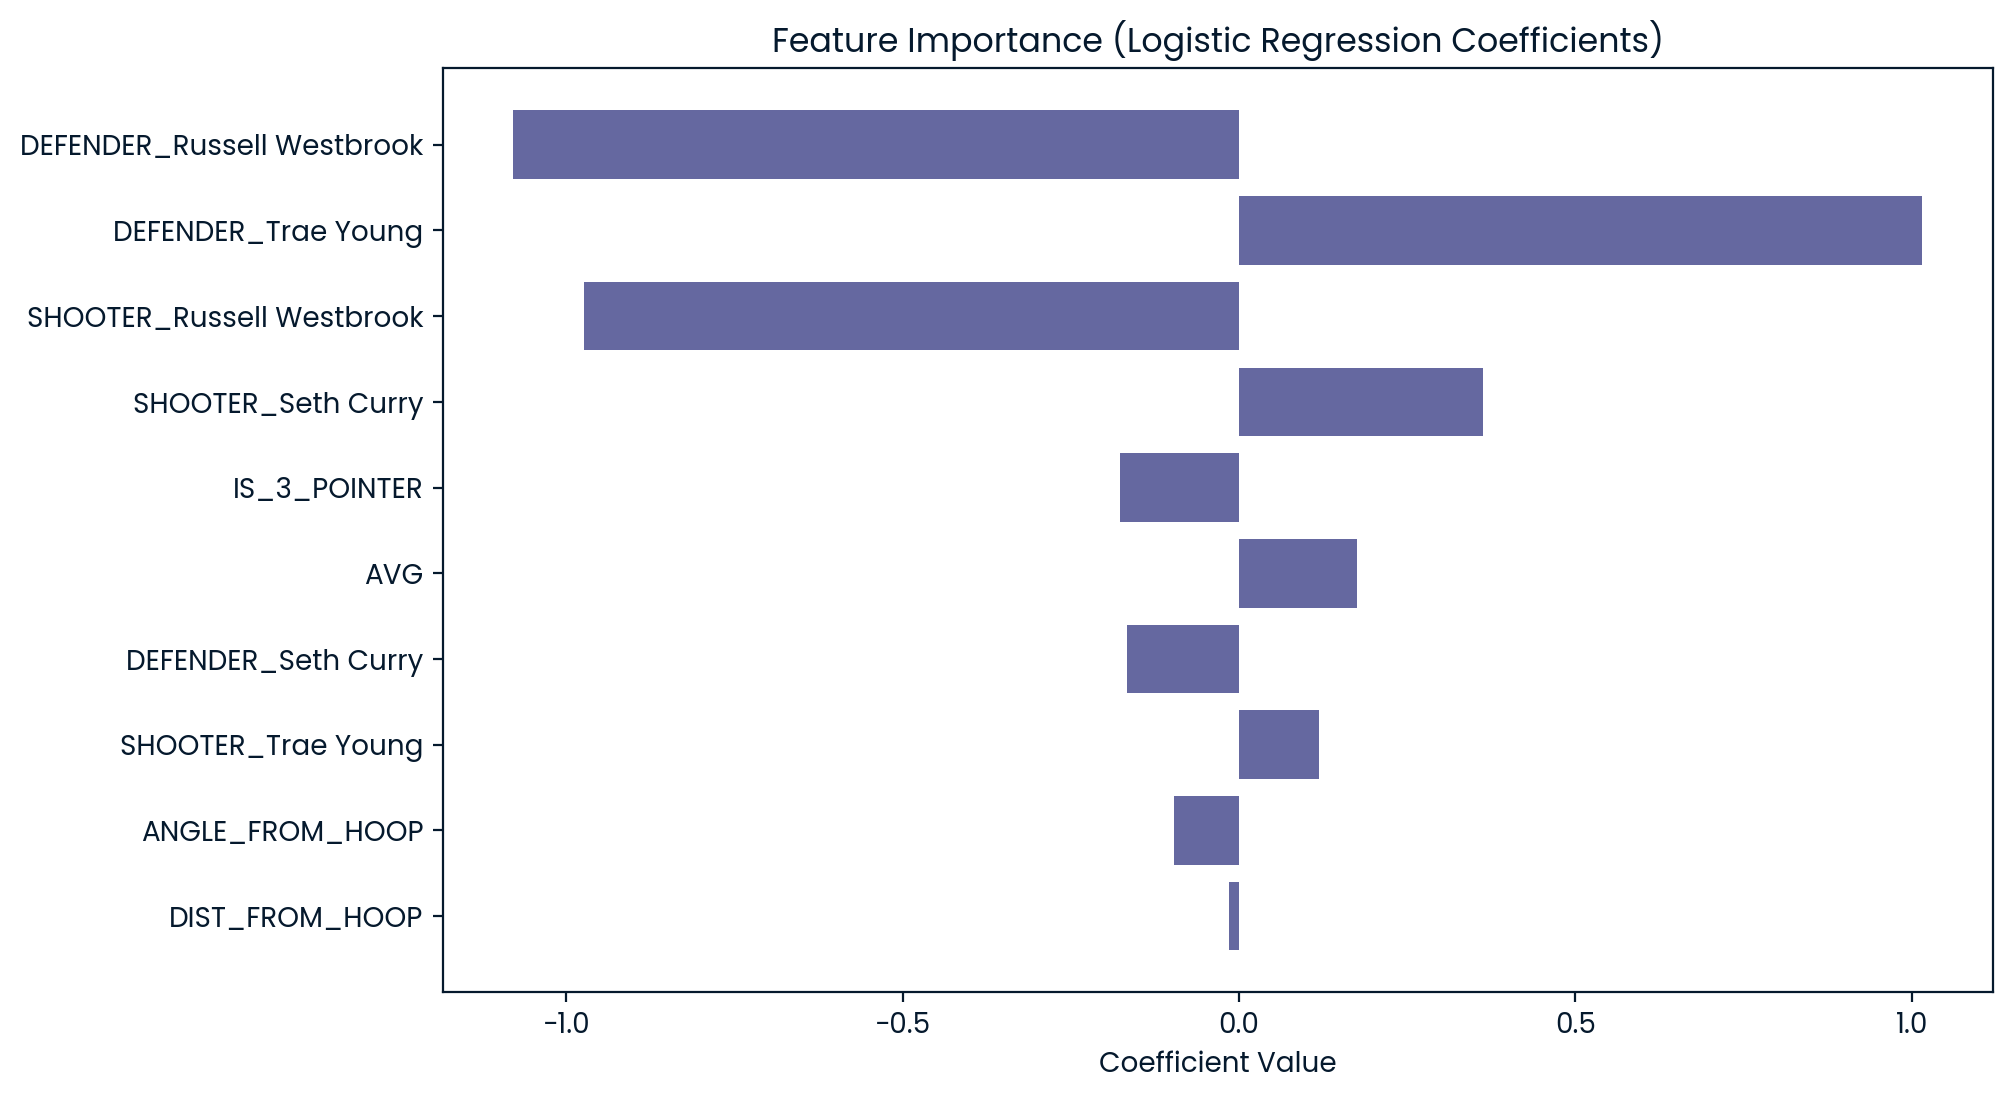

In [270]:
plt.figure(fig15)
plt.show()

These coefficients are based on Chris Paul being the standard, as we used the "drop first" feature to avoid multicollinearity with one-hot encoded defenders. This avoids the problem of coefficients becoming unstable and "double-counting" the feature of shooter identity in our models. This is why Chris Paul is not listed on the y-axis


Interpretation:

SHOOTER_Seth Curry     0.362186

This can be interpreted as Chris Paul has a lower chance of making a shot compared to Seth Curry. 

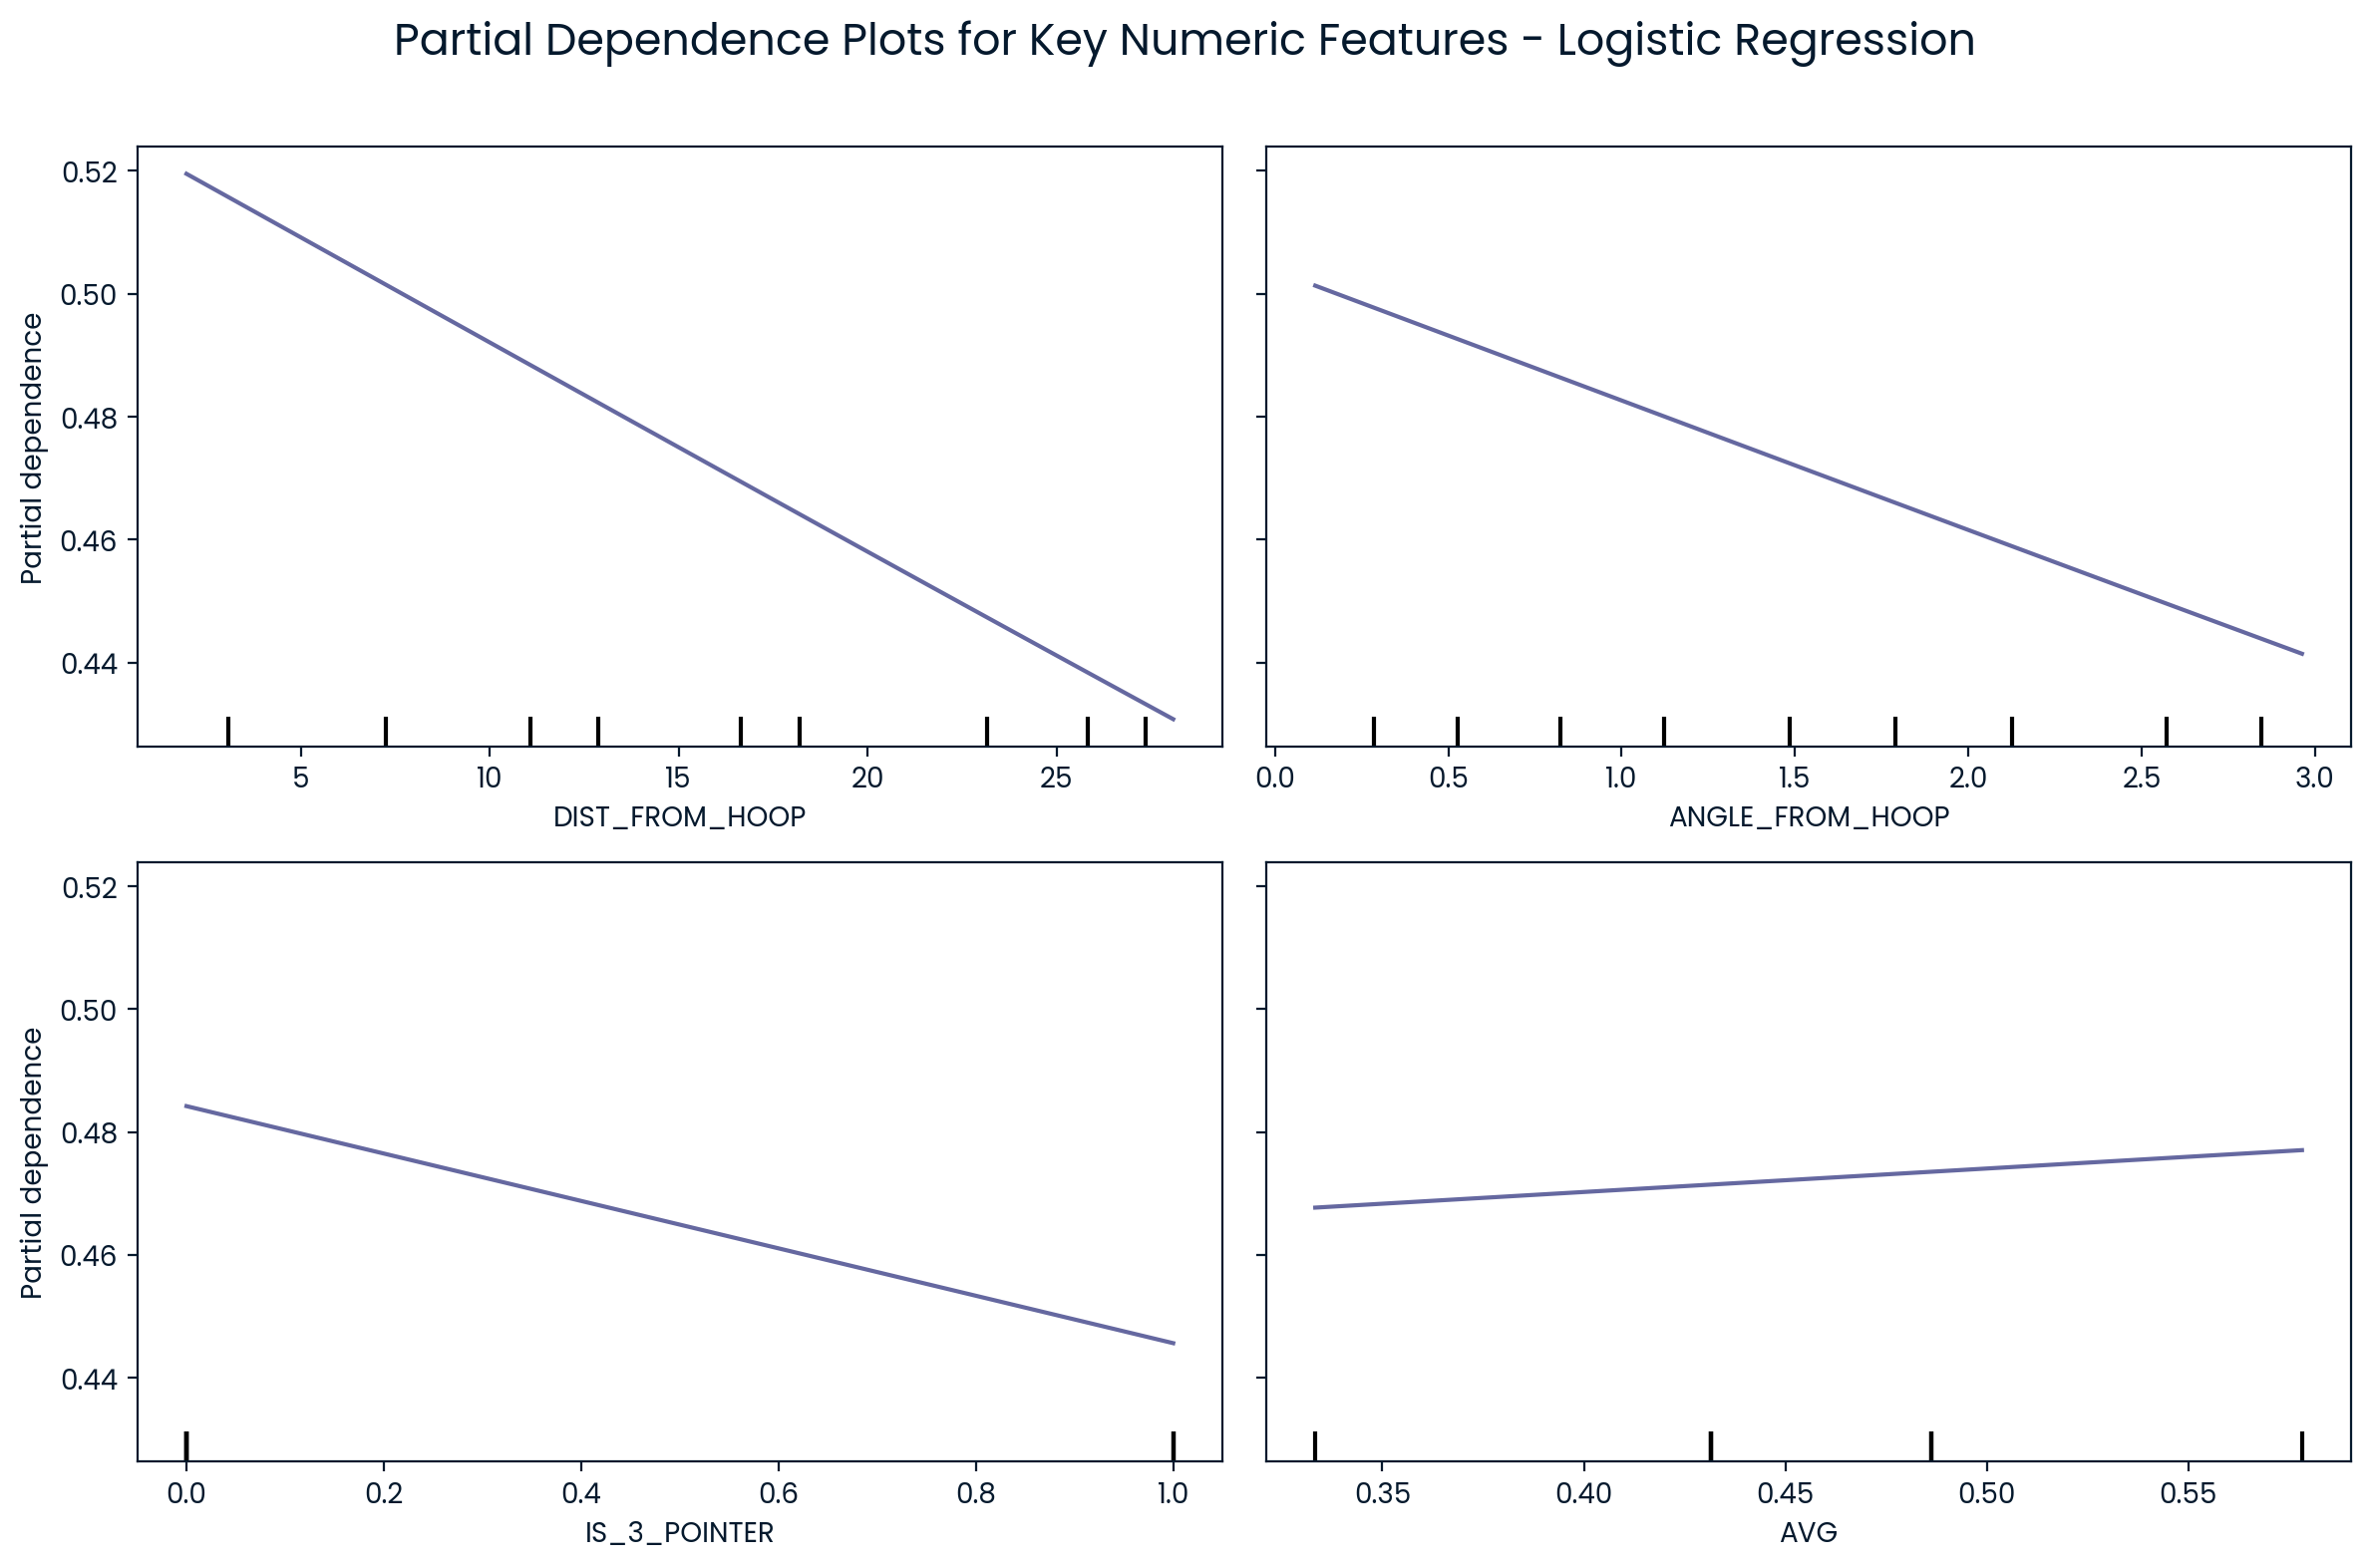

In [271]:
plt.figure(pdp2)
plt.show()

The PDP graphs align with what we expected. If we consider a shot further from the rim, at a sharper angle to the rim, or a contested 3-pointer, we can imagine that these shots are more difficult. The PDP graphs show negative slopes for these features, which shows that the model agrees with this intuition. We can also say that players with a higher AVG shot percentage are more likely to score. The PDP plot for the AVG shot percentage is positive, reflecting that the model agrees with this intuition as well. 

## Final Takeaways

This project demonstrated that it's possible to predict NBA shot outcomes using spatial and contextual features like shot location and defender identity. Our exploratory analysis provided strong qualitative insights into player tendencies and defensive pressure, while our machine learning models—especially logistic regression—produced reasonably accurate predictions based on the data available.

The findings have practical applications for coaching, scouting, and game strategy. With more detailed in-game data (like time on the clock, dribble count, or defender distance), the models could likely be improved even further. Ultimately, this project showed that integrating visual analysis with machine learning can yield meaningful insights into player performance under varying conditions, and help answer complex performance questions with data.

**Limitations:** 
Some limitations included the amount of data involved and not having the intuition to pick better models. If we had more data, our model might have been more accurate, as we could have created better and more relevant features. This would have potentially increased the accuracy of the random forest model. Secondly, if we had better intuition regarding different models, we can expect a better result from these other models. Since the model only had 4 player and the interactions between them, more data would have allowed us to create a more scalable model. 

# 6. Contribution Report
**Rivan Adhikari**: Contributed to EDA by creating a 2-pointer vs. 3-pointer segmented bar graph and the 1 on 1 heat map. Also helped select the modeling approach, implemented the logistic regression model with cross-validation, and created visualizations to interpret model performance and feature influence. 

**Stephen Labuda**: created graphs for type of shot breakdown for EDA; developed Random Forest Model and supported cross validation and k-folds decision making; supported model selection and determining steps for deciding final model.

**MinhKhang Nguyen**: Engineered and visualized a new statistic, "Difficult Shot per Player." Authored the entire (pre-revised) writing of the report. Introduced the first version of the confusion matrix. Contributed to model selection and the design of the final modeling steps. Provided NBA knowledge to ensure the code output aligned with the general perception of each player.

**Zane Ali**: Created the individual and holistic shot maps in scatterplot format. This included, adding the lines of the court and hoop for visualizing where the shots were taken. I also helped develop the concept of the difficult shot metric. Provided NBA knowledge to ensure the code output aligned with the general perception of each player. Helped with how features and coeffcients work in the random forest and logistic regression model.  

Everyone contributed to writing, editing, and reviewing the report. Sections of code for visualizations were also contributed to as a whole, especially when it came to formatting. 